URL dashboard = https://public.tableau.com/app/profile/muhammad.julizar/viz/IOWALiquorSalesin2020-2021/Dashboard1?publish=yes

# 1. Perkenalan 
- Nama      : Muhammad Julizar
- Batch     : RMT-16

# Query from BigQuery 
```
select 
      invoice_and_item_number, 
      date,
      extract(year from date) as year,
      extract(quarter from quarter) as quarter, 
      item_description,state_bottle_cost, state_bottle_retail,
      bottles_sold,sale_dollars,
      category_name, store_name,
      city, vendor_name,
from bigquery-public-data.iowa_liquor_sales.sales
where category_name is not null 
      and date between'2021-01-01' and '2022-12-31';
```


# Problem Statement
## Mengetahui perbandingan tingkat penjualan dan keuntungan dari produk-produk minuman keras di negara bagian Iowa setiap bulan pada tahun 2021 hingga 2022

### Penjabaran Masalah : 
1. Berapa total pendapatan dari penjualan minuman keras di negara bagian IOWA, USA dalam usd setiap bulan pada tahun 2021 dan 2022?
2. Berapa total profit dari penjualan minuman keras di negara bagian IOWA, USA setiap bulan pada tahun 2021 dan tahun 2022?
3. Kota mana sajakah yang memiliki total pendapatan paling banyak dari penjualan minuman keras?
4. Produk apa saja yang paling banyak mendapatkan profit?<br>


#### Statistik deskriptif<br>
5. Apakah terdapat oulier pada data yang ditarik dari BigQuery, jika iya. Berapakah jumlah data outlier?
6. Bandingkan central tendency dari nilai rata-rata setiap produk pada data yang terdapat outlier dan tidak! <br>


#### Statistik Inferential<br>
7. Bandingkan rata-rata profit penjualan minuman keras di negara bagian IOWA, USA pada setiap bulannya dari data populasi dengan data yang anda tarik dari BigQuery! Apakah terdapat penurunan atau peningkatan? (Lakukan hipotesis testing untuk menjawab pertanyaan ini)


In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

# Data Loading

In [2]:
# Loading data dari directory Local
df = pd.read_csv('D:\Hacktiv 8\Full time Data Science\Phase 0\Milestone\Milestone1\iowa_liquor_sales.csv')


In [3]:
# Menampilkan 5 data paling awal
df.head()

,invoice_and_item_number,date,year,quarter,month,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,category_name,store_name,city,vendor_name
0,INV-37952300005,2021-06-30,2021,2,6,St George Botanivore Gin,17.50,26.25,18,472.50,Flavored Gin,John's Grocery,Iowa City,ST GEORGE SPIRITS INC
1,INV-40682000006,2021-10-05,2021,4,10,Cedar Ridge Sir Maple,23.00,34.50,84,2898.00,Temporary & Specialty Packages,Cedar Ridge Vineyards,Swisher,CEDAR RIDGE VINEYARDS LL
2,INV-32794300300,2020-12-16,2020,4,12,Glenlivet 12YR,25.98,38.97,120,4676.40,Single Malt Scotch,Hy-Vee Food Store #5 / Cedar Rapids,Cedar Rapids,PERNOD RICARD USA
3,INV-27186300002,2020-05-12,2020,2,5,Everclear 151,4.20,6.30,3,18.90,Neutral Grain Spirits,Guddi Mart / Waterloo,Waterloo,LUXCO INC
4,INV-34948500086,2021-03-11,2021,1,3,Glenlivet 12YR,29.48,44.22,2,88.44,Single Malt Scotch,Quick Shop / Clear Lake,ClearLake,PERNOD RICARD USA


In [4]:
# Menampilkan 5 data paling bawah
df.tail()

,invoice_and_item_number,date,year,quarter,month,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,category_name,store_name,city,vendor_name
5236390,INV-42237500004,2021-11-22,2021,4,11,Black Velvet Toasted Caramel,5.23,7.85,2,15.7,Canadian Whiskies,A to Z Liquor / Cherokee,Cherokee,Heaven Hill Brands
5236391,INV-42126800016,2021-11-18,2021,4,11,Black Velvet Apple,5.23,7.85,2,15.7,Canadian Whiskies,Kum & Go #542 / Urbandale,Urbandale,Heaven Hill Brands
5236392,INV-37727600140,2021-06-22,2021,2,6,Black Velvet Apple,5.23,7.85,2,15.7,Canadian Whiskies,Hy-Vee Wine and Spirits / Waterloo,Waterloo,Heaven Hill Brands
5236393,INV-34101100008,2021-02-08,2021,1,2,Black Velvet,5.23,7.85,2,15.7,Canadian Whiskies,Kum & Go #532/ West DSM,West Des Moines,Heaven Hill Brands
5236394,INV-38812400007,2021-07-30,2021,3,7,Remy Martin VSOP,5.23,7.85,72,565.2,Imported Brandies,Sahota Food Mart,Des Moines,REMY COINTREAU USA INC


In [5]:
# Memeriksa info kolom, dan tipe data pada kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236395 entries, 0 to 5236394
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   year                     int64  
 3   quarter                  int64  
 4   month                    int64  
 5   item_description         object 
 6   state_bottle_cost        float64
 7   state_bottle_retail      float64
 8   bottles_sold             int64  
 9   sale_dollars             float64
 10  category_name            object 
 11  store_name               object 
 12  city                     object 
 13  vendor_name              object 
dtypes: float64(3), int64(4), object(7)
memory usage: 559.3+ MB


In [6]:
# Mengganti tipe data kolom date dari object ke datetime
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Memeriksa ulang apakah berhasil di eksekusi perubahan tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236395 entries, 0 to 5236394
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   year                     int64         
 3   quarter                  int64         
 4   month                    int64         
 5   item_description         object        
 6   state_bottle_cost        float64       
 7   state_bottle_retail      float64       
 8   bottles_sold             int64         
 9   sale_dollars             float64       
 10  category_name            object        
 11  store_name               object        
 12  city                     object        
 13  vendor_name              object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 559.3+ MB


# Data Cleaning

In [8]:
# Merubah nama kolom 
df = df.rename(columns={'invoice_and_item_number': 'invoice',
                    'item_description': 'item', 
                    'state_bottle_cost':'cost', 
                    'state_bottle_retail': 'price', 
                    'bottles_sold':'quantity',
                    'category_name':'category',
                    'store_name':'store',
                    })

In [9]:
# Menambahkan 2 kolom baru dari perhitungan kolom yang sudah ada

df['profit'] = df['sale_dollars'] - (df['cost']*df['quantity'])
pd.options.mode.chained_assignment = None
df['percent profit (%)'] = (df['profit'] / df['sale_dollars'])*100
pd.set_option('display.precision', 2)
df

,invoice,date,year,quarter,month,item,cost,price,quantity,sale_dollars,category,store,city,vendor_name,profit,percent profit (%)
0,INV-37952300005,2021-06-30,2021,2,6,St George Botanivore Gin,17.50,26.25,18,472.50,Flavored Gin,John's Grocery,Iowa City,ST GEORGE SPIRITS INC,157.50,33.33
1,INV-40682000006,2021-10-05,2021,4,10,Cedar Ridge Sir Maple,23.00,34.50,84,2898.00,Temporary & Specialty Packages,Cedar Ridge Vineyards,Swisher,CEDAR RIDGE VINEYARDS LL,966.00,33.33
2,INV-32794300300,2020-12-16,2020,4,12,Glenlivet 12YR,25.98,38.97,120,4676.40,Single Malt Scotch,Hy-Vee Food Store #5 / Cedar Rapids,Cedar Rapids,PERNOD RICARD USA,1558.80,33.33
3,INV-27186300002,2020-05-12,2020,2,5,Everclear 151,4.20,6.30,3,18.90,Neutral Grain Spirits,Guddi Mart / Waterloo,Waterloo,LUXCO INC,6.30,33.33
4,INV-34948500086,2021-03-11,2021,1,3,Glenlivet 12YR,29.48,44.22,2,88.44,Single Malt Scotch,Quick Shop / Clear Lake,ClearLake,PERNOD RICARD USA,29.48,33.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236390,INV-42237500004,2021-11-22,2021,4,11,Black Velvet Toasted Caramel,5.23,7.85,2,15.70,Canadian Whiskies,A to Z Liquor / Cherokee,Cherokee,Heaven Hill Brands,5.24,33.38
5236391,INV-42126800016,2021-11-18,2021,4,11,Black Velvet Apple,5.23,7.85,2,15.70,Canadian Whiskies,Kum & Go #542 / Urbandale,Urbandale,Heaven Hill Brands,5.24,33.38
5236392,INV-37727600140,2021-06-22,2021,2,6,Black Velvet Apple,5.23,7.85,2,15.70,Canadian Whiskies,Hy-Vee Wine and Spirits / Waterloo,Waterloo,Heaven Hill Brands,5.24,33.38
5236393,INV-34101100008,2021-02-08,2021,1,2,Black Velvet,5.23,7.85,2,15.70,Canadian Whiskies,Kum & Go #532/ West DSM,West Des Moines,Heaven Hill Brands,5.24,33.38


In [10]:
# Memeriksa jumlah missing values
df.isna().sum()

invoice                 0
date                    0
year                    0
quarter                 0
month                   0
item                    0
cost                    0
price                   0
quantity                0
sale_dollars            0
category                0
store                   0
city                  277
vendor_name             4
profit                  0
percent profit (%)      0
dtype: int64

Terdapat missing values pada kolom city dan vendor_name, saya putuskan untuk menghapus row yang berisi missing values, dikarenakan hanya sedikit data yang memiliki missing values

In [11]:
# Menghapus missing values
df = df.dropna()
df.isna().sum()

invoice               0
date                  0
year                  0
quarter               0
month                 0
item                  0
cost                  0
price                 0
quantity              0
sale_dollars          0
category              0
store                 0
city                  0
vendor_name           0
profit                0
percent profit (%)    0
dtype: int64

In [12]:
# Melihat Skewness kolom profit
df['profit'].skew()

109.87369179827917

Skewness kolom profit menghasilkan 109.87 hal itu melebihi angka > 0.5, sehingga ini tergolong dari right skew yang sangat extreme.


<AxesSubplot: title={'center': 'Profit distribution'}>

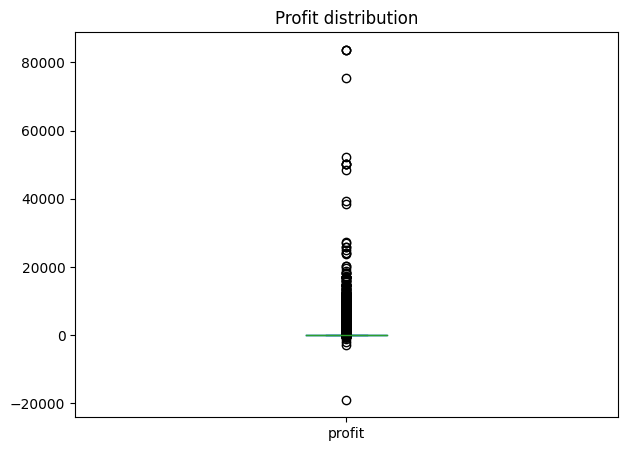

In [13]:
# Melihat distribusi data profit
df['profit'].plot(kind='box', title= 'Profit distribution', figsize=(7,5))

Dari distribusi diatas terdapat banyak sekali outlier pada kolom profit, Hal ini tergolong data tidak normal sehingga perlu dibersihkan menggunakan IQR.


In [14]:
# Menghapus data outlier pada kolom profit dengan IQR 
Q1 = df.profit.quantile(0.25)
Q3 = df.profit.quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [15]:
# Memeriksa skewness data yang sudah dihilangkan outliernya pada kolom profit
df_profit_no_outlier = df[(df.profit> lower_limit) & (df.profit < upper_limit)]
df_profit_no_outlier['profit'].skew()

1.0361139916077038

<AxesSubplot: title={'center': 'Profit distribution'}>

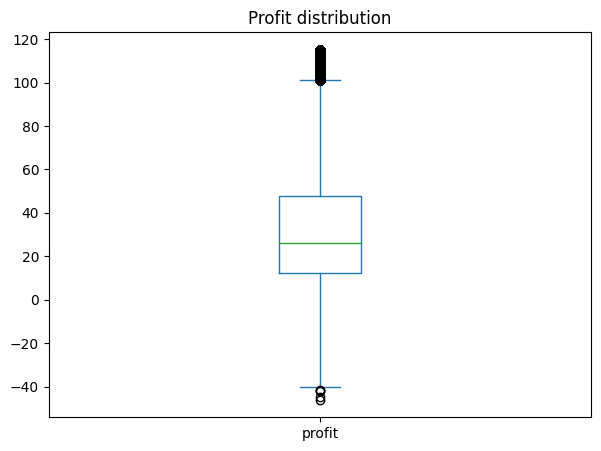

In [16]:
# Memeriksa ulang distribusi data dengan grafik box 
df_profit_no_outlier['profit'].plot(kind='box', title= 'Profit distribution', figsize=(7,5))

Distribusi data sudah sedikit lebih normal namun masi terdapat profit yang negatif dimana hal tersebut masi perlu untuk dibersihkan.

<AxesSubplot: title={'center': 'Profit distribution'}>

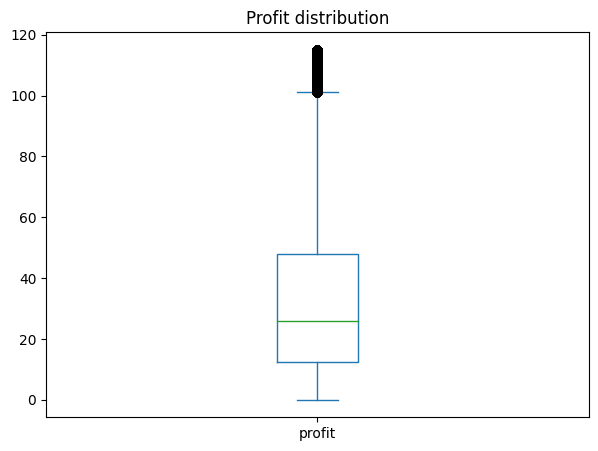

In [17]:
# Membersihkan data negatif pada kolom profit
df_profit_no_outlier2 =  df_profit_no_outlier[df_profit_no_outlier['profit'] > 0]
# memeriksa ulang data negatif pada kolom profit
df_profit_no_outlier2['profit'].plot(kind='box', title= 'Profit distribution', figsize=(7,5))

Setelah data yang bernilai negatif pada kolom profit berhasil dibersihkan, kita perlu memeriksa data sale_dollars apakah sudah normal atau belum.

<AxesSubplot: title={'center': 'sale_dollars distribution'}>

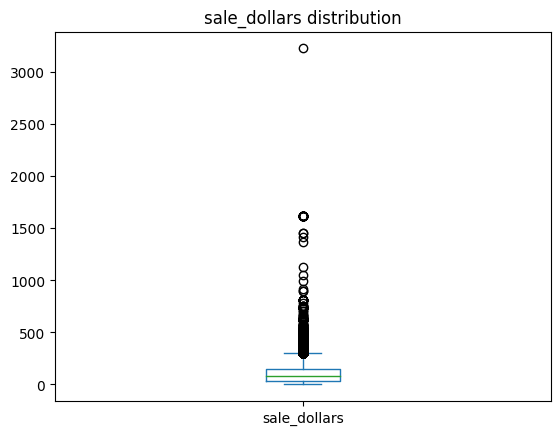

In [18]:
# Memeriksa kolom sale_dollars untuk selanjutnya dibersihkan menggunakan IQR
df_profit_no_outlier2['sale_dollars'].plot(kind='box', title= 'sale_dollars distribution')

Data pada kolom sale dollars masi terdapat outlier yang extreme, data tersebut harus dibersihkan agar distribusi data menjadi lebih baik

In [19]:
# Menghapus data outlier pada kolom sale_dollars dengan IQR 
Q1_v2 = df_profit_no_outlier2.sale_dollars.quantile(0.25)
Q3_v2 = df_profit_no_outlier2.sale_dollars.quantile(0.75)
IQR_v2 = Q3_v2-Q1_v2
upper_limit_v2 = Q3_v2 + 1.5*IQR_v2
lower_limit_v2 = Q1_v2 - 1.5*IQR_v2

# Memeriksa skewness data pada kolom sale_dollars
df_fix = df_profit_no_outlier2[(df_profit_no_outlier2.sale_dollars> lower_limit) & (df_profit_no_outlier2.sale_dollars < upper_limit)]
df_fix.sale_dollars.skew()

0.20957459353001268

Didapatkan nilai skewness < 0.5 yang menunjukkan data pada df_fix sudah menjadi normal sehingga data siap di olah

<AxesSubplot: title={'center': 'Sale_dollars distribution'}>

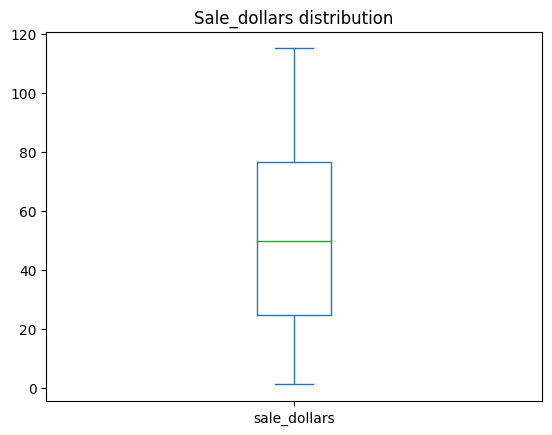

In [20]:
# Memeriksa distribusi data sale_dollars pada df_fix 
df_fix['sale_dollars'].plot(kind='box', title= 'Sale_dollars distribution')

# Analisis dan Perhitungan
1. Berapa total penjualan(sales) dalam usd setiap bulan pada tahun 2021 dan 2022?
2. Berapa total profit penjualan setiap bulan pada tahun 2021 dan tahun 2022?
3. Kota mana sajakah yang memiliki total pendapatan paling banyak dari penjualan minuman keras?
4. Produk apa saja yang paling banyak mendapatkan profit?

<AxesSubplot: xlabel='year,month'>

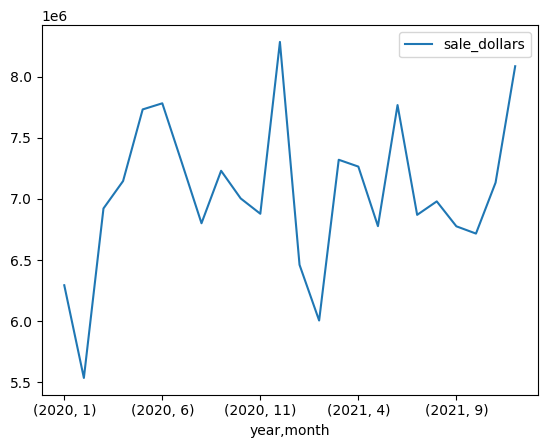

In [36]:
df_fix.groupby(['year','month'])[['sale_dollars']].sum().sort_values(by=['year', 'month'],ascending=True).plot()


In [22]:
df_fix.groupby(['year','month'])[['sale_dollars']].sum().sort_values(by=['sale_dollars'],ascending=False).head(3)

,,sale_dollars
year,month,
2020,12,8.28e+06
2021,12,8.08e+06
2020,6,7.78e+06


1. Berapa total penjualan(sales) dalam usd setiap bulan pada tahun 2021 hingga 2022?


Grafik diatas menyimpulkan bahwa penjualan setiap bulan pada tahun 2021 hingga 2022 mengalami trend yang fluktuatif sehingga tidak dapat disimpulkan setiap bulannya terdapat peningkatan atau penurunan.<br>
Total penjualan terbanyak terjadi pada bulan Desember 2020, Desember 2021 dan Juni 2020 

<AxesSubplot: xlabel='year,month'>

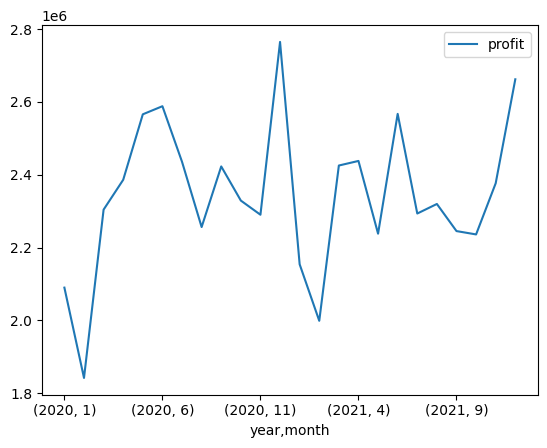

In [23]:
df_fix.groupby(['year','month'])[['profit']].sum().sort_values(by=['year', 'month'],ascending=True).plot()

In [24]:
df_fix.groupby(['year','month'])[['profit']].sum().sort_values(by=['profit'],ascending=False).head(3)

,,profit
year,month,
2020,12,2.76e+06
2021,12,2.66e+06
2020,6,2.59e+06


2. Berapa total profit penjualan setiap bulan pada tahun 2021 dan tahun 2022?

Grafik dan data pada total profit berbanding lurus dengan total penjualan sehingga sama-sama memiliki grafik yang fluktuatif dan juga profit tertinggi juga terjadi pada pada bulan Desember 2020, Desember 2021 dan Juni 2020 

<AxesSubplot: xlabel='city'>

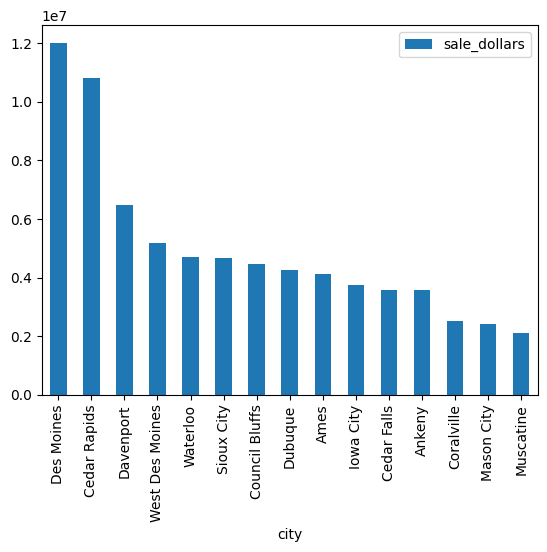

In [25]:
df_fix.groupby(['city'])[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).head(15).plot(kind= 'bar')

In [26]:
df_fix.groupby(['city'])[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).head(3)

,sale_dollars
city,
Des Moines,1.20e+07
Cedar Rapids,1.08e+07
Davenport,6.48e+06


3. Kota mana sajakah yang memiliki total pendapatan paling banyak dari penjualan minuman keras?

Melihat dari total penjualan minuman keras di IOWA, terdapat 3 kota yang paling banyak total penjualannya yaitu : 
- Des Moines
- Cedar Rapids
- Davenport

<AxesSubplot: xlabel='category'>

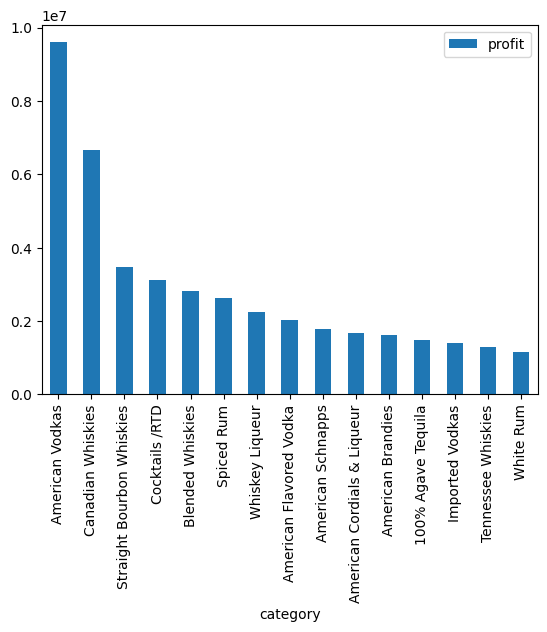

In [27]:
df_fix.groupby(['category'])[['profit']].sum().sort_values(by=['profit'], ascending=False).head(15).plot(kind= 'bar')

In [28]:
df_fix.groupby(['category'])[['profit']].sum().sort_values(by=['profit'], ascending=False).head(3)

,profit
category,
American Vodkas,9.60e+06
Canadian Whiskies,6.65e+06
Straight Bourbon Whiskies,3.46e+06


4. Produk apa saja yang paling banyak mendapatkan profit?

Produk yang mendapatkan total profit paling banyak adalah :
- American Vodkas
- Canadian Whiskies
- Straight Bourbon Whiskies

### Statistik Deskriptif 

In [29]:
# Memeriksa jumlah outlier pada kolom profit, dengan cara = data asli - data tanpa outlier
df_outlier = df[(df['profit'] < lower_limit) | (df['profit'] > upper_limit)]
print(len(df) - len(df_fix))

2017797


Pada perhitungan ini didapatkan 2,017,797 outlier dari data Iowa_liquor_sale

#### Perbandingan Central Tendency dari profit setiap produk pada data yang terdapat outlier dan tidak terdapat outlier

In [30]:
print('Mean')
print(f'Mean raw data : {round(df.profit.mean(),2)}')
print(f'Mean Clean data : {round(df_fix.profit.mean(),2)}')

print('Median')
print(f'Median raw data : {round(df.profit.median(),2)}')
print(f'Median Clean data : {round(df_fix.profit.median(),2)}')

print('Modus')
print(f'Median raw data : {round(df.profit.mode()[0],2)}')
print(f'Median Clean data : {round(df_fix.profit.mode()[0],2)}')


Mean
Mean raw data : 52.38
Mean Clean data : 17.47
Median
Median raw data : 28.08
Median Clean data : 16.52
Modus
Median raw data : 30.0
Median Clean data : 30.0


### Hasil central tendency
Dari hasil perhitungan central tendency didapatkan bahwa : 
1. rata-rata profit setiap produk mengalami penurunan setelah menghapus outlier
2. Median profit pada setiap produk Mengalami penurunan setelah data outlier dihilangkan
3. Namun nilai Modus pada data profit setiap produk tidak berubah walaupun data outlier sudah dihapus 

# Query from BigQUery
```
select
round((total_profit /  120),2) as profit_monthly,
from
  (select 
  sum(profit) as total_profit,
  from
          (select 
          date,
          sale_dollars - (state_bottle_cost*bottles_sold) as profit
          from bigquery-public-data.iowa_liquor_sales.sales)
          where date < '2021-12-31')
```
Profit_monthly = 8,864,969.43 USD

### Statistik Inferential
Dalam kurun waktu 10 tahun rata-rata profit perbulan iowa_liquor_sale adalah `8,864,969.43 USD`. <br>
Namun selama 2 tahun pendapatan rata-rata setiap bulannya adalah `6,154,997.26 USD`<br>
Apakah liquor sales di iowa mengalami penurunan?

H0: μ > = `8,864,969.43 USD`<br>
H1: μ < `8,864,969.43 USD`


## One sample one tailed

Critical value = 2 * 0.05 = 0.1

In [31]:
df_monthly = df_fix.groupby(['year', 'month'])[['profit']].sum() 
df_monthly

profit
year month          
2020 1      2.09e+06
     2      1.84e+06
     3      2.30e+06
     4      2.39e+06
     5      2.57e+06
     6      2.59e+06
     7      2.44e+06
     8      2.26e+06
     9      2.42e+06
     10     2.33e+06
     11     2.29e+06
     12     2.76e+06
2021 1      2.15e+06
     2      2.00e+06
     3      2.43e+06
     4      2.44e+06
     5      2.24e+06
     6      2.57e+06
     7      2.29e+06
     8      2.32e+06
     9      2.25e+06
     10     2.24e+06
     11     2.38e+06
     12     2.66e+06

In [32]:
t_stat,p_val = stats.ttest_1samp(df_monthly.profit, 8864969.43 )
print('P-value:', p_val/2)

P-value: 1.790575112535683e-36


## Hasil hipotesis testing
Pada kasus ini didapatkan `p-value < Critical` Value, hal ini menyebabkan terjadi penolakan pada H0 sehingga dapat disimpulkan kalau profit perbulan pada tahun 2021-2022 terakhir mengalami penurunan

# KESIMPULAN 
Dari analisis data pada penjualan minuman keras di negara bagian IOWA USA,  dapat disimpulkan : 
1. Terdapat banyak data outlier yang berjumlah 2,017,797, sehingga perlu di bersihkan agar distribusi data tidak terlalu extreme.
2. Total penjualan dan total profit terbanyak berbanding lurus, dengan trend yang fluktuatif. dan terjadi pada bulan Desember 2020, Desember 2021 dan Juni 2020
3. Kota-kota yang menyumbang total pendapatan terbanyak dari penjualan minuman keras di negara bagian IOWA adalah : Des Moines, Cedar Rapids, Davenport
4. Profit yang paling banyak didapatkan berasal dari produk :  American Vodkas, Canadian Whiskies, Straight  Bourbon Whiskies

7. Dari hasil perhitungan central tendency didapatkan bahwa : 
-  rata-rata profit setiap produk mengalami penurunan setelah menghapus outlier
-  Median profit pada setiap produk Mengalami penurunan setelah data outlier dihilangkan
-  Namun nilai Modus pada data profit setiap produk tidak berubah walaupun data outlier sudah dihapus 

6. Dilakukan hipotesis testing untuk melihat rata-rata profit perbulan dalam 10 tahun terakhir. Didapatkan hasil bahwa pada tahun 2020-2021 pendapatan perbulan mengalami penurunan dari 8,864,969.43 USD menjadi 6,154,997.26 USD.

## Solusi
Diperlukan teknik marketing yang lebih baik agar dapat meningkatakan profit dalam penjualan minuman keras di negara bagian IOWA USA

In [33]:
df_fix.to_csv('D:\Hacktiv 8\Full time Data Science\Phase 0\Milestone\Milestone1\Fix_data_sales_liquor.csv')